In [50]:
import pandas as pd

# Load the data from CSV
file = './iota_h0_h1_components_with_balance_removing_0Values.csv'

data = pd.read_csv(file)
print(data.columns)



Index(['component', 'num_of_addrs', 'address_ids', 'component_size',
       'num_of_edges', 'total_balance'],
      dtype='object')


In [51]:

data['total_balance'] = pd.to_numeric(data['total_balance'], errors='coerce')  # Convert to float, coerce errors

# Sort the data by 'total_balance' in descending order
sorted_data = data.sort_values(by='total_balance', ascending=False)


# Extract the top 100 entries, focusing on 'component' and 'total_balance' columns
top_100 = sorted_data.head(100)[['component', 'total_balance']]

# Assuming 'address_ids' needs to be checked as well
print(top_100[['component', 'total_balance']])

# Optional: Save the top 100 to a new CSV file
top_100.to_csv('top_100_addresses.csv', index=False)

       component  total_balance
0              0   1.221199e+16
5607       11972   4.128551e+13
15035      34900   1.750000e+13
9025       19940   1.402298e+13
11457      25797   1.203790e+13
...          ...            ...
10052      22392   5.000000e+11
1409        2901   4.932268e+11
27967      70841   4.774975e+11
29026      73988   4.701647e+11
4872       10355   4.695984e+11

[100 rows x 2 columns]


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data_csv = pd.read_csv('../Api_Analysis/top_100_addresses_From_Dataset.csv')
data_api = pd.read_csv('../Api_Analysis/100_richest_addresses_From_API.csv')

In [62]:
# Rename columns if necessary
data_csv.columns = ['component', 'balance_csv']
data_api.columns = ['address', 'balance_api']

# Convert balances to numeric types, just to be sure
data_csv['balance_csv'] = pd.to_numeric(data_csv['balance_csv'], errors='coerce')
data_api['balance_api'] = pd.to_numeric(data_api['balance_api'], errors='coerce')

# Assume the address lists are not in the same order and might not match exactly
# Merge the two dataframes on the address field if possible, or simply compare the top balances
comparison = pd.merge(data_csv, data_api, left_index=True, right_index=True, how='outer')

# Calculate differences
comparison['difference'] = comparison['balance_csv'] - comparison['balance_api']

# Print the data to check
print(comparison.head())

# Check if balances are exactly the same
if comparison['difference'].sum() == 0:
    print("All balances match exactly.")
else:
    print("There are differences in the balances.")


   component   balance_csv                                            address  \
0          0  1.221199e+16  iota1qrukjnd6jhgwc0ls6dgt574sxuulcsmq5lnzhtv4j...   
1      11972  4.128551e+13  iota1qrkwdhv2juxue3ju8ug9wfyw2q68qh495cjsn87sv...   
2      34900  1.750000e+13  iota1qpgu2huct4k599rh0ry9ffjs6dm8xhpzq3jmfd4ta...   
3      19940  1.402298e+13  iota1qr4chj9jwhauvegqy40sdhj93mzmvc3mg9cmzlv2y...   
4      25797  1.203790e+13  iota1qp8h9augeh6tk3uvlxqfapuwv93atv63eqkpru029...   

       balance_api    difference  
0  427213259282672  1.178478e+16  
1  396484615591109 -3.551991e+14  
2  323905135000000 -3.064051e+14  
3  282360742596927 -2.683378e+14  
4  265621482587100 -2.535836e+14  
There are differences in the balances.


Total balance from top_100_addresses.csv: 1.2460431723124902e+16
Total balance from 100_richest_addresses_From_API.csv: 3334089139444421
Difference between CSV and API balances: 9126342583680480.0


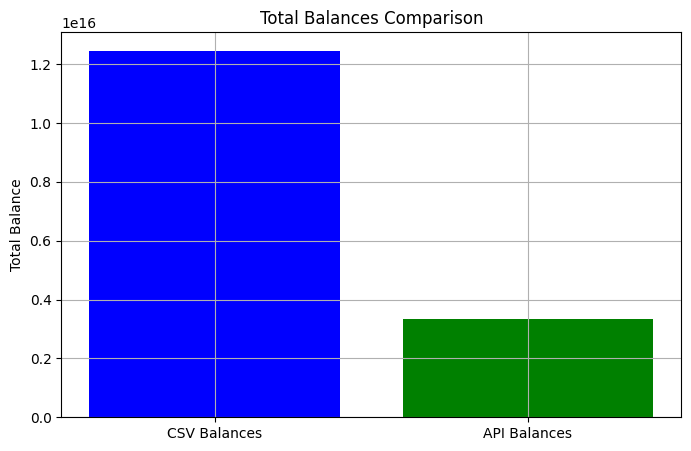

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename columns if necessary
data_csv.columns = ['component', 'balance_csv']
data_api.columns = ['address', 'balance_api']

# Convert balances to numeric types
data_csv['balance_csv'] = pd.to_numeric(data_csv['balance_csv'], errors='coerce')
data_api['balance_api'] = pd.to_numeric(data_api['balance_api'], errors='coerce')

# Sum the balances
total_balance_csv = data_csv['balance_csv'].sum()
total_balance_api = data_api['balance_api'].sum()

# Calculate the difference
balance_difference = total_balance_csv - total_balance_api

# Print the total balances for confirmation
print(f"Total balance from top_100_addresses.csv: {total_balance_csv}")
print(f"Total balance from 100_richest_addresses_From_API.csv: {total_balance_api}")
print(f"Difference between CSV and API balances: {balance_difference}")
# Plot the total balances
labels = ['CSV Balances', 'API Balances']
totals = [total_balance_csv, total_balance_api]

plt.figure(figsize=(8, 5))
plt.bar(labels, totals, color=['blue', 'green'])
plt.title('Total Balances Comparison')
plt.ylabel('Total Balance')
plt.grid(True)
plt.show()

Total balance from top_100_addresses.csv (excluding first component): 248442315629832.0
Total balance from 100_richest_addresses_From_API.csv: 3334089139444421
Difference between CSV (excluding first component) and API balances: 3085646823814589.0


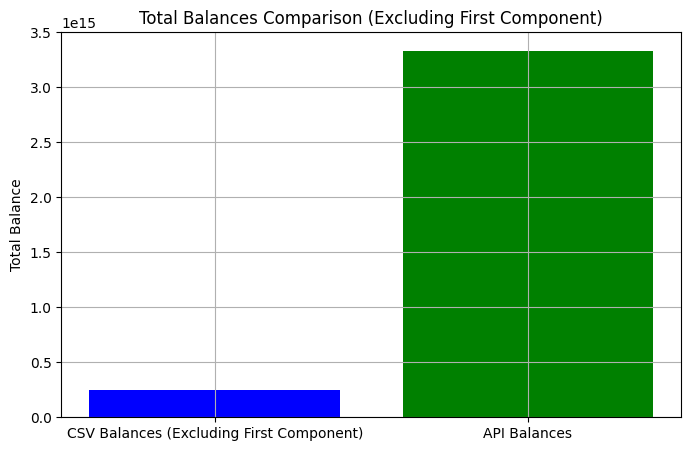

In [66]:
# Rename columns if necessary
data_csv.columns = ['component', 'balance_csv']
data_api.columns = ['address', 'balance_api']

# Convert balances to numeric types
data_csv['balance_csv'] = pd.to_numeric(data_csv['balance_csv'], errors='coerce')
data_api['balance_api'] = pd.to_numeric(data_api['balance_api'], errors='coerce')

# Exclude the first component from the data_csv dataset
data_csv_excluded = data_csv.iloc[1:]

# Sum the balances without the first component
total_balance_csv_excluded = data_csv_excluded['balance_csv'].sum()
total_balance_api = data_api['balance_api'].sum()

# Calculate the difference
balance_difference_excluded =  total_balance_api - total_balance_csv_excluded

# Print the total balances for confirmation
print(f"Total balance from top_100_addresses.csv (excluding first component): {total_balance_csv_excluded}")
print(f"Total balance from 100_richest_addresses_From_API.csv: {total_balance_api}")
print(f"Difference between CSV (excluding first component) and API balances: {balance_difference_excluded}")

# Plot the total balances
plt.figure(figsize=(8, 5))
plt.bar(['CSV Balances (Excluding First Component)', 'API Balances'], [total_balance_csv_excluded, total_balance_api], color=['blue', 'green'])
plt.title('Total Balances Comparison (Excluding First Component)')
plt.ylabel('Total Balance')
plt.grid(True)
plt.show()
